In [1]:
import numpy as np

# 어떻게 학습을 시킬것인가
  
__학습이란 무엇인가?__  
* 학습 = 훈련데이터를 통해 신경망의 매개변수의 최적값을 자동으로 획득하는것  
  
__매개변수의 최적값의 기준은?__  
손실함수를 이용한다. 손실함수는 얼마나 정답에 가까운지 나타내는것.  
  
__손실함수를 이용해서 어떻게 매개변수에 영향을 주는가?__  
손실함수와 매개변수의 상관관계는 '미분값'을 통해서 알 수 있다. 손실함수 그래프의 지역적 극소점을 찾기 위해 미분값을 이용해 매개변수를 업데이트 한다.  
이때 대표적으로 경사하강법이 사용된다.  
  
__범용능력이란?__  
훈련데이터에 포함되지 않은 데이터 또한 올바르게 정답을 추론하는 능력. 이것이 기계학습의 목표이다.  
  
__오버피팅이란?__  
한 데이터셋에만 지나치게 최적화된 상태. 다른 데이터셋에서 올바른 출력을 하지 못할 확률이 올라간다.  
  

## 1. 손실함수
손실함수는 output과 정답의 차이(error)를 나타낸다. 대표적인 두 종류의 error가 있다. 이때 정답은 one-hot-encoding 방식으로 표현한다.  
따라서 밑의 예시의 $t_k$는 0아니면 1이다.  
  
### 1.1 Mean Squared Error
$
E \, = \, \frac{1}{2} \sum_{k} (y_k - t_k)^2 \, (t_k: True Answer, \, y_k: output)
$  

In [2]:
def MSE(y:np.array, t:np.array):
    return 0.5*np.sum((y - t) ** 2)

### 1.2 Cross Entropy Error
$
E \, = \, - \sum_{k} (t_k \log_{e}{y_k}) \, (t_k: True Answer, \, y_k: output)
$  
  

In [3]:
def CCE(y:np.array, t:np.array):
    delta = 1e-7 # log_e에 적용되는 값이 0이 아니도록 하는 상수
    return -np.sum(t * np.log(y + delta))

### 1.3 미니배치 학습과 손실함수 형태  
batch 학습의 경우 데이터 전체에 대해 error값의 평균을 Error로 사용한다.  
따라서 아래와 같은 형태의 손실함수를 갖게 된다.  
$
MSE \, = \, \frac{1}{N} \sum_{n} (\frac{1}{2} \sum_{k} (y_k - t_k)^2) \\
CCE \, = \, \frac{1}{N} \sum_{n} (- \sum_{k} (t_k \log_{e}{y_k}))
$  

## 2. 경사하강법
매개변수가 많은 함수의 최솟값을 구하기는 어려운일이다. 신경망의 학습의 경우 다양한 매개변수가 관여하는 손실함수를 최솟값으로 만들어야한다. 
이때 경사하강법을 이용하게된다.  
  
경사하강법은 기울기가 0이되는 지점을 찾는 방식이다. 극소, 최소값을 갖는 지점의 기울기가 0이라는 특징을 이용한것이다.  

### 2.1 기울기 구하기
어떤 함수 $f$의 기울기는 다음으로 정의 할 수 있다. $slope \, of \, f \, = \, (\frac{\partial f}{\partial x_1},\,\frac{\partial f}{\partial x_2}, \cdots , \frac{\partial f}{\partial x_n})$  
수치적 미분을 이용한 편미분을 이용한다.  
이때 중앙차분 방식으로 미분한다.

In [6]:
# @param function - 수치적으로 미분할 함수
# @param x - 매개변수
def numerical_diff(f, x:np.array):
    x_gap = 0.001
    result = np.zeros_like(x)
    
    for (x_idx, x_origin_val) in enumerate(x):
        
        x[x_idx] += x_gap
        f1 = f(x) # function(x+h)
        x[x_idx] -= 2*x_gap
        f2 = f(x) # function(x-h)
        
        result[x_idx] = (f1 - f2) / (2*x_gap)
        
        x[x_idx] = x_origin_val # 입력값 정상화
    
    return result

### 2.2 기울기를 이용한 경사하강법
위의 방식으로 구한 기울기를 이용해 각 매개변수를 갱신하면된다.  
수식은 다음과 같다.  
$
x_i \, := \, x_i - \alpha\frac{\partial f}{\partial x_i}
$  
위 수식에서 $x$는 매개변수, $f$는 손실함수, $\alpha$는 학습률을 의미한다.  
이때 학습률이 크면 빠르게 매개변수가 갱신되지만 정확한 극소점을 찾는데 어려움이 있을 수 있으며, 학습률이 작으면 오랜 시간이 걸릴수 있다.  

## 3. 신경망에 경사하강법 적용해보기
신경망의 각 층을 살펴보면 층을 구성하는 요소들을 행렬로 나타낼 수 있다.  
입력 $X$, 입력에 대한 가중치 $W$, 층의 출력 $Y$, 층에 적용되는 편향$B$.  
이들간의 관계를 나타내면 다음과 같다.  
$
XW \, + \, B \, = \, Y \\ \\
when\,loss\,is\,defined\,as\,L \\ \\
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Y} X^T \\ \\
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} W^T \\ \\
\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}\\ \\
$  
위의 값들을 이용해 각 요소들을 업데이트 한다.  

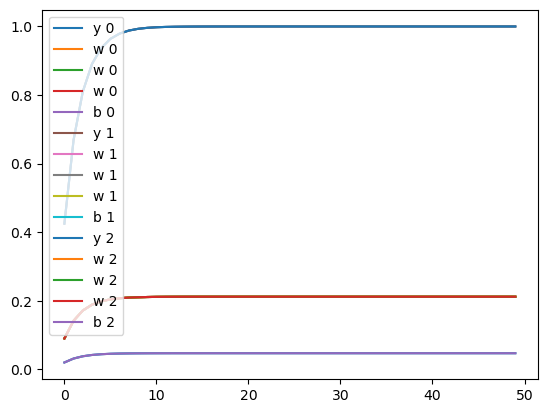

In [16]:
import matplotlib.pyplot as plt

class Layer:
    # X: 입력 데이터
    # W: 가중치
    # B: 편향값
    # T: 정답
    # Y: 출력값
    #
    def __init__(self, X:np.array):
        
        self.X = X
        self.T = np.ones(3)
        self.Y = np.zeros(3)
        self.W = np.random.choice(1, (X.size, 3))
        self.B = np.random.choice(1, 3)
        self.Y = self.X.dot(self.W) + self.B
        
    def loss_function(self, Y):
        return 0.5*np.sum((self.T - Y) ** 2)
    
    # 위의 수식을 이용해서 가중치와 편향값을 조절한다.
    def action(self, alpha=0.02):
        
        dLdY = numerical_diff(self.loss_function, self.Y)
        dLdW = dLdY.dot(np.transpose(self.X))
        dLdB = dLdY.copy()
        
        self.W = self.W - alpha*dLdW
        self.B = self.B - alpha*dLdB
        self.Y = self.X.dot(self.W) + self.B
        return (self.Y, self.W, self.B)
    

test = Layer(X = np.array([1.2, 1.8, 1.5]))
steps = np.arange(0, 50, 1)
y = [[],[],[]]
w = [[],[],[]]
b = [[],[],[]]
for i in steps:
    Y, W, B = test.action()
    for idx in range(0, 3):
        y[idx].append(Y[idx])
        w[idx].append(W[idx])
        b[idx].append(B[idx])

for idx in range(0, 3):
    y[idx] = np.array(y[idx])
    b[idx] = np.array(b[idx])
    w[idx] = np.array(w[idx])
    
    plt.plot(steps, y[idx], label='y %d' % idx)
    plt.plot(steps, w[idx], label='w %d' % idx)
    plt.plot(steps, b[idx], label='b %d' % idx)
    
plt.legend()
plt.show()
            

위에서 learning rate인 alpha를 변경하면 학습의 양상이 변화함을 알 수 있다.  